# Importing packages

In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from time import sleep
import pickle
import shutil
import os
from collections import defaultdict
import pandas as pd

# Creating the data loader

In [3]:
path = Path('train')

catdog = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

dls = catdog.dataloaders(path)

Showing some examples from train set

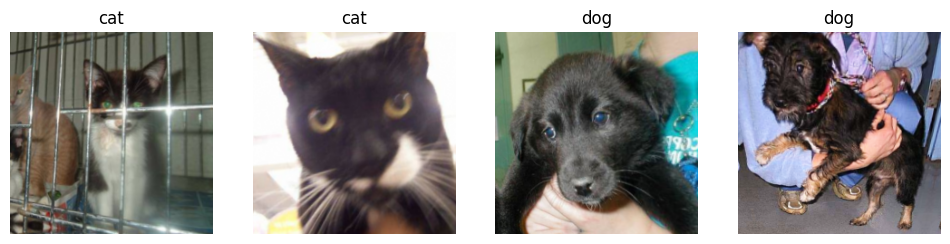

In [4]:
dls.train.show_batch(max_n=4, nrows=1)

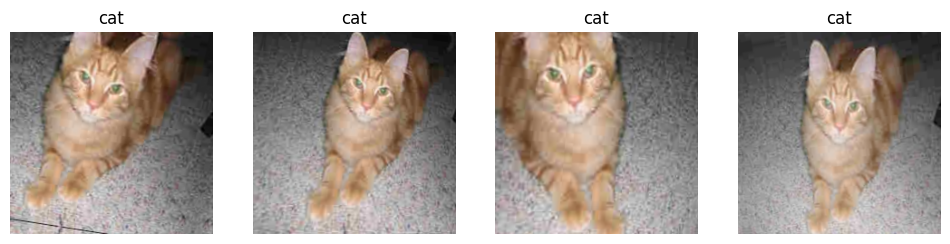

In [5]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Showing examples from validation set

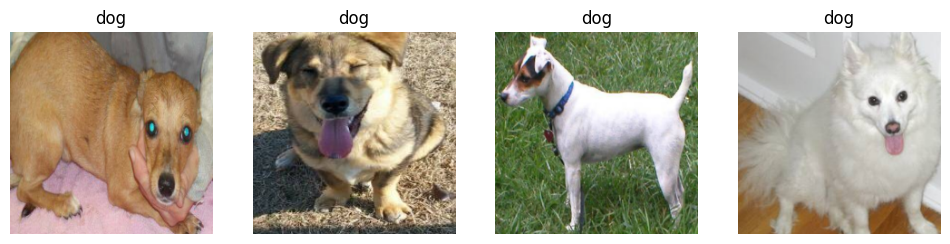

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

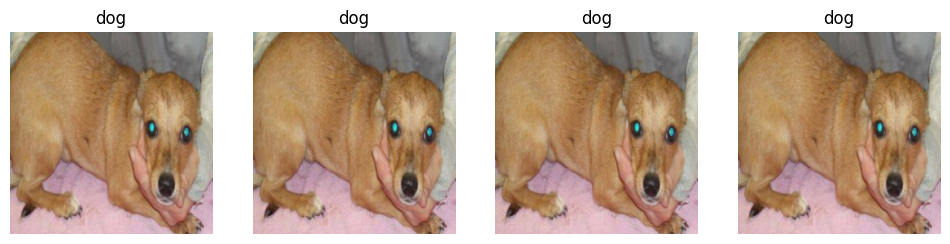

In [7]:
dls.valid.show_batch(max_n=4, nrows=1, unique=True)

# Model training

In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

c:\Users\vchar\anaconda3\envs\audio_finder\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
c:\Users\vchar\anaconda3\envs\audio_finder\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vchar\anaconda3\envs\audio_finder\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.123541,0.050640,0.018600,18:42


epoch,train_loss,valid_loss,error_rate,time
0,0.081245,0.038630,0.014600,21:01
1,0.068959,0.032276,0.012000,16:24
2,0.046729,0.031358,0.011400,39:18
3,0.026099,0.027497,0.010600,33:36
4,0.021537,0.025491,0.009000,20:21


Saving the model

In [9]:
learn.export()

# Model interpretation

Creating confusion matrix

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Showing images with top 5 losses

In [ ]:
interp.plot_top_losses(5, nrows=1)

Checking images

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner